In [4]:
## import packages
import numpy as np 
import pandas as pd 
from covid19dh import covid19
from datetime import date
from Get_covid_data import get_data
import pymc3 as pm
import pandas as pd 
import numpy as np 
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt
import os 
import theano
import theano.tensor as tt 
import random
import fns as f
import PyCipio4v as pc 
import pickle


<AxesSubplot:xlabel='t', ylabel='y'>

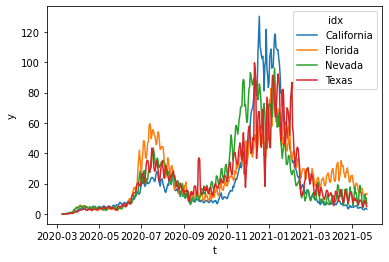

In [5]:
## load data
d = pd.read_pickle("../data/data_ex3.pkl")

## check data
sns.lineplot(data = d, x = "t", y = "y", hue = "idx")

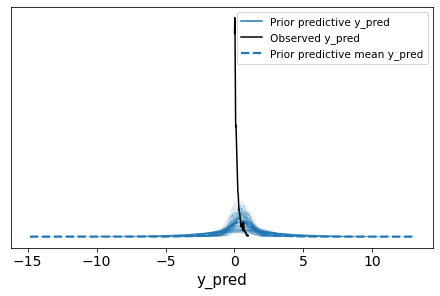

In [13]:
##### create class ######
sim = pc.PyCipio(d, time = "t", values = "y", index = "idx", split = 0.7)

##### fit mod: both just 1 #####
## NB: if there is only one argument to mode which does something (multiplicative).
## perhaps we should just set it as a true/false?
sim.fit(p1 = (7, 1), p2 = (75, 3), p1_mode = "multiplicative", p2_mode = "additive")

In [14]:
##### sample #####
sim.sample_mod()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sigma, alpha, beta_line, beta_p2_waves, p2, beta_p1_waves, p1]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 1693 seconds.


0, dim: idx, 1236 =? 1236


The acceptance probability does not match the target. It is 0.9713623169014461, but should be close to 0.99. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-packages\pymc3\sampling.py:1687: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


posterior predictive variable y_pred's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


0, dim: idx, 1236 =? 1236


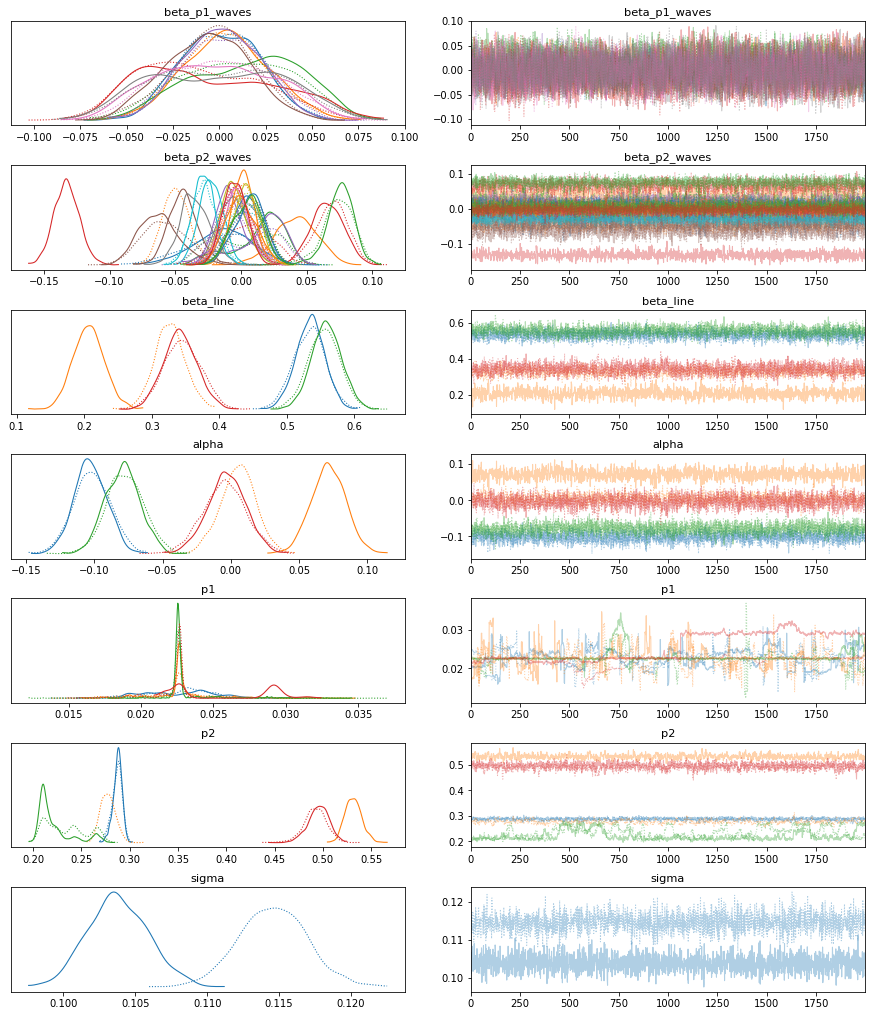

In [15]:
##### plotting #####
## issue: 1970 from somewhere.
sim.plot_trace()

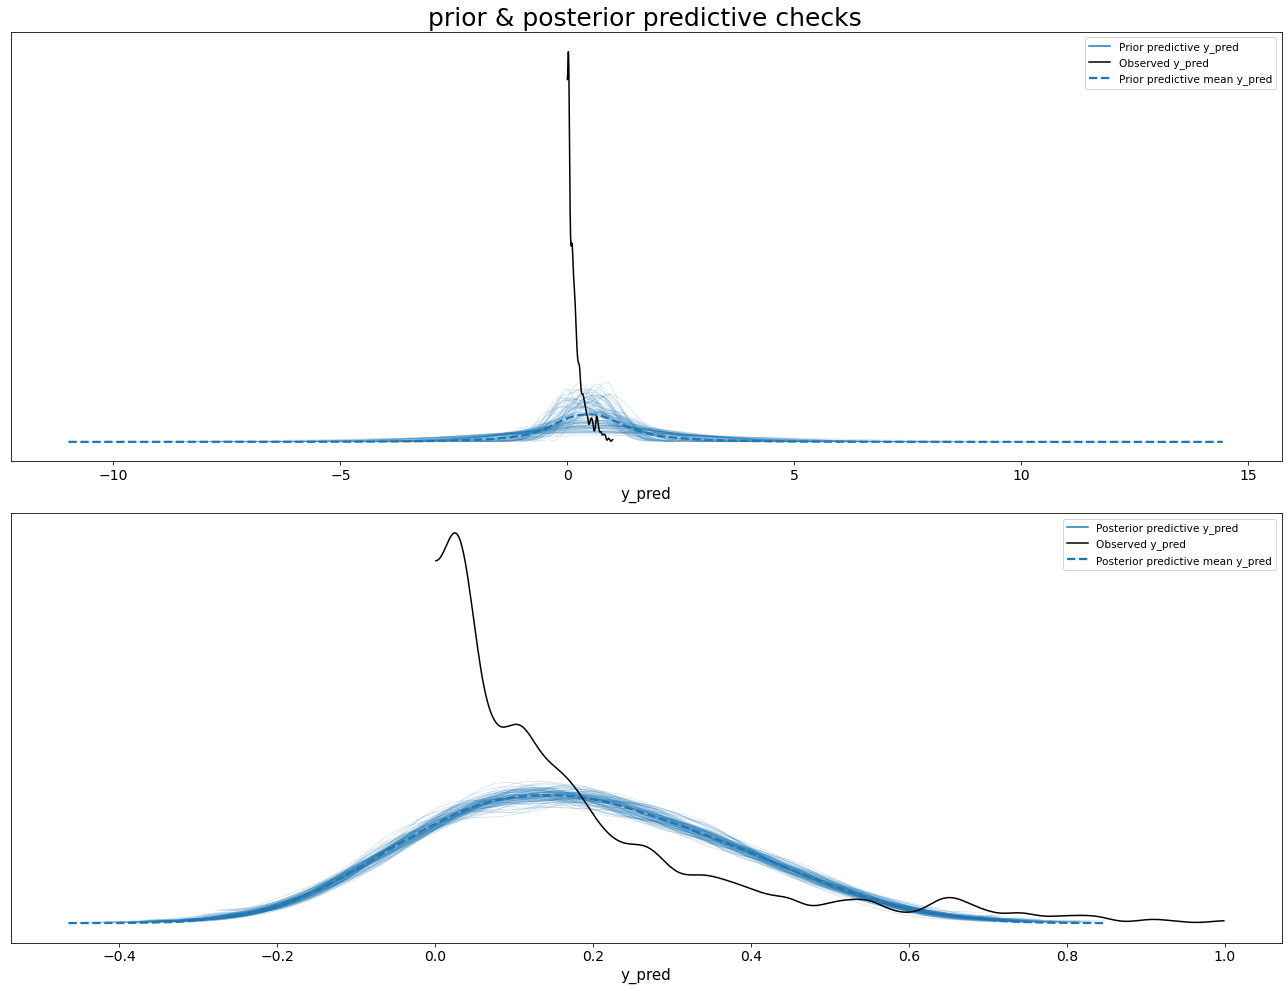

In [16]:
sim.plot_pp()

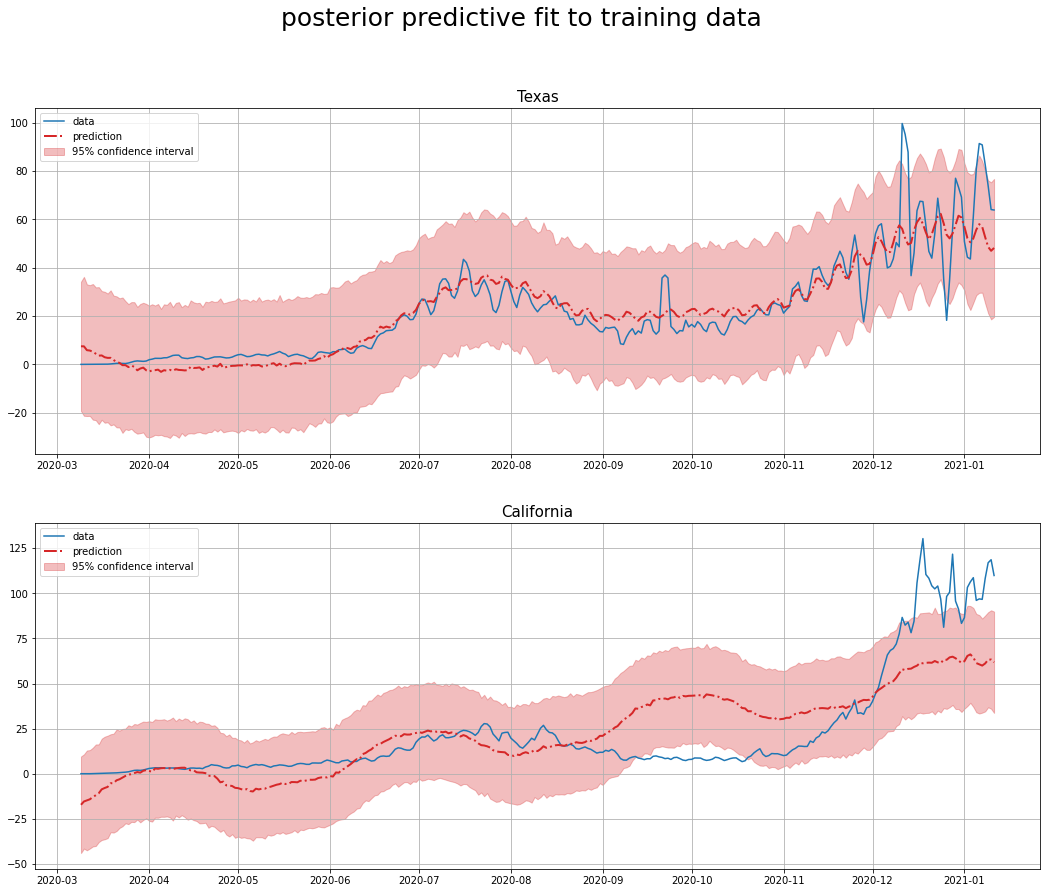

In [17]:
### plot training ###
sim.plot_fit_idx(["Texas", "California"])
#sim.plot_train_idx("California")

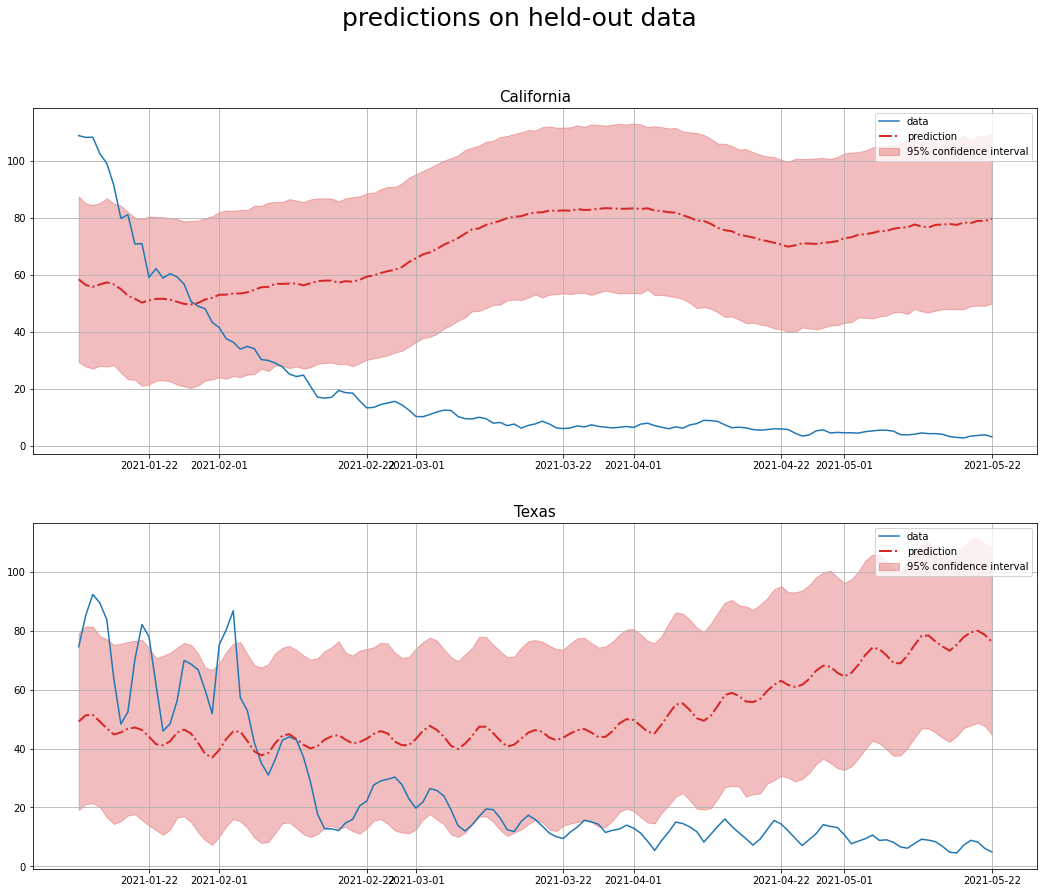

In [18]:
sim.plot_predict_idx(["California", "Texas"])

In [ ]:
### save idata ###
sim.save_idata("../models/m_ex3_7-1_30-1")